# Feature Selection



## Support Vector Classification


The goal of this method called Support Vector Machine is to separate the positive and negative classes of the data using a linear hyperplane.



In [1]:
import pandas
from sklearn.svm import LinearSVC
df = pandas.read_csv('~/Dropbox/datasets/iris.csv')

In [2]:
X = df.drop('Species', axis=1)
y = df.Species

In [3]:
# Build a SVM model
model = LinearSVC()


In [4]:
# Cross-Validate it with 10-fold Stratified KFold
from sklearn.model_selection import cross_val_score
round(cross_val_score(model, X, y, cv=10).mean(), 2)

0.97

This number is "accuracy", which is another measure of performance.  

Note: we discussed "precision" and "recall".

Accuracy = (TP + TN) / (TP+FP+TN+FN)



In [5]:
# What more can we learn from the model.  Build the model using all data.
model.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [6]:
model.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
model.coef_

array([[ 0.18422967,  0.45123141, -0.80794223, -0.45071561],
       [ 0.04627066, -0.88245579,  0.41419768, -0.97547418],
       [-0.85071429, -0.98671266,  1.3809421 ,  1.86546412]])

In [8]:
model.intercept_

array([ 0.10956065,  1.69308822, -1.70948078])

In [9]:
X = df[['PetalWidth', 'PetalLength']]
model.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [10]:
model.coef_

array([[-0.81021863, -0.61570655],
       [-1.15661618,  0.5837578 ],
       [ 1.70097784,  0.28015436]])

In [11]:
model.intercept_

array([ 2.12825956, -1.13613782, -4.17111076])

In [12]:
df.head(1)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa


In [13]:
import numpy
x = numpy.array([0.25, 1.55])

In [14]:
model.coef_.dot(x) + model.intercept_

array([ 0.97135974, -0.52046728, -3.31162705])

In [15]:
df.sample()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
135,7.7,3.0,6.1,2.3,virginica


In [16]:
x = numpy.array([0.175, 5.1])

In [17]:
model.coef_.dot(x) + model.intercept_

array([-1.15363213,  1.63861912, -2.44465243])

In [18]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
model.coef_

array([[-0.81021863, -0.61570655],
       [-1.15661618,  0.5837578 ],
       [ 1.70097784,  0.28015436]])

In [20]:
import seaborn
from matplotlib.pyplot import show
seaborn.relplot(x='PetalWidth', y='PetalLength', data=df)

## Breast cancer dataset


In [21]:
df = pandas.read_csv('~/Dropbox/datasets/breastcancer/wisconsin.csv')
df.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial,bare_nuclei,blan_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [22]:
df['class'].value_counts()

2    444
4    239
Name: class, dtype: int64

Let's choose two best features to study. 

- mitoses (how fast cell divides)
- clump thickness (appears like an important feature)
- bare nuclei (cancerous cells tend to have larger nuclei)





In [23]:
X = df[ ['mitoses', 'bare_nuclei']]
y = df[ 'class' ]

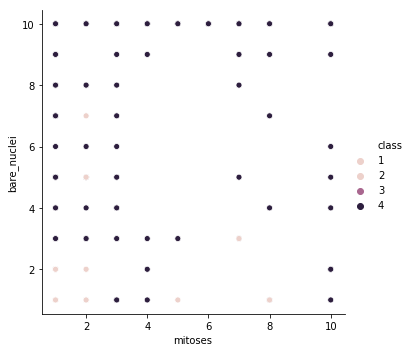

In [24]:
seaborn.relplot(x='mitoses', y='bare_nuclei', hue='class', data=df)

In [25]:
cross_val_score( LinearSVC(), X, y, cv=10 ).mean()

0.9149972643177973

A few observations of good features we want to select:

1. We like features that are highly variant.  The more variant the feature, the more "spread out" the data is along this dimension/feature. This means the easier we can separate the data.

2. Features that depend well with the target.  We don't want to select features that are independent of the target.

3. We like features that are orthogonal.  Features that are correlated tend to confuse the classifier.



## SELECT FEATURES WITH HIGHEST VARIANCE

In [26]:

df.var()

id                       3.851990e+11
clump_thickness          7.956694e+00
cell_size_uniformity     9.395113e+00
cell_shape_uniformity    8.931615e+00
marginal_adhesion        8.205717e+00
epithelial               4.942109e+00
bare_nuclei              1.327770e+01
blan_chromatin           6.001013e+00
normal_nucleoli          9.318772e+00
mitoses                  3.002160e+00
class                    9.112463e-01
dtype: float64

In [27]:
X = df[['cell_size_uniformity', 'bare_nuclei']]

In [28]:
cross_val_score(LinearSVC(), X, y, cv=10).mean()

0.9548586988331997

In [29]:
from sklearn.feature_selection import VarianceThreshold
X = df.drop(['id', 'class'], axis=1)
sel = VarianceThreshold(threshold = 9.0)
X_selected = sel.fit_transform(X)
X_selected[0:5]

array([[ 1,  1,  1],
       [ 4, 10,  2],
       [ 1,  2,  1],
       [ 8,  4,  7],
       [ 1,  1,  1]])

In [30]:
df.var()

id                       3.851990e+11
clump_thickness          7.956694e+00
cell_size_uniformity     9.395113e+00
cell_shape_uniformity    8.931615e+00
marginal_adhesion        8.205717e+00
epithelial               4.942109e+00
bare_nuclei              1.327770e+01
blan_chromatin           6.001013e+00
normal_nucleoli          9.318772e+00
mitoses                  3.002160e+00
class                    9.112463e-01
dtype: float64

In [31]:
X.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial,bare_nuclei,blan_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [32]:
cross_val_score(LinearSVC(), X_selected, y, cv=10).mean()

0.9592497868712702

## SELECT FEATURES THAT ARE MOST DEPENDENT ON THE TARGET (class 2 or 4)


In [33]:

from sklearn.feature_selection import chi2

In [34]:
stats, pvalues = chi2(X,y)

In [35]:
stats

array([ 624.13570418, 1370.06458731, 1279.76770412,  986.41787922,
        497.53676321, 1729.0661744 ,  682.97823856, 1143.8667119 ,
        228.99434634])

In [36]:
pvalues

array([9.42456550e-138, 6.72214798e-300, 2.81844644e-280, 1.60897588e-216,
       3.26530327e-110, 0.00000000e+000, 1.50405225e-150, 9.65768418e-251,
       9.87781582e-052])

The smaller the p-value, the more statistically significant the test is. p=0.05 is statistically significant. p=0.01 is statistically highly significant.

Sklearn lets you select things a little conveniently.

In [37]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(chi2, k=3)
X_selected = sel.fit_transform(X, y)

In [38]:
X_selected[0:10]

array([[ 1,  1,  1],
       [ 4,  4, 10],
       [ 1,  1,  2],
       [ 8,  8,  4],
       [ 1,  1,  1],
       [10, 10, 10],
       [ 1,  1, 10],
       [ 1,  2,  1],
       [ 1,  1,  1],
       [ 2,  1,  1]])

In [39]:
X.head(10)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial,bare_nuclei,blan_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [40]:
cross_val_score(LinearSVC(), X_selected, y, cv=10).mean()

0.9577572495578373

In [41]:
cross_val_score(LinearSVC(), X, y, cv=10).mean()

0.9664961636828645

## Feature Selection via Decision Tree

Some classification methods algorithmically compute the importance of each feature.  We can take advantage of this; relying on the algorithm of the method (e.g. Decision Tree classification) to evaluate the importance of each feature.

In [42]:
df = pandas.read_csv('~/Dropbox/datasets/iris.csv')

In [43]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X, y = df.drop('Species', axis=1), df.Species
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
model.feature_importances_


array([0.02666667, 0.        , 0.05072262, 0.92261071])

In [46]:
X.columns


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')

In [47]:
from draw_tree import visualize_tree

In [48]:
visualize_tree(model, X.columns, 'dt-iris')


File saved to dt-iris.png


In [49]:
# Look at breast cancer dataset

cancer = pandas.read_csv('~/Dropbox/datasets/breastcancer/wisconsin.csv')
X, y = cancer.drop(['id','class'], axis=1), cancer['class']
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
model.feature_importances_

array([0.05333905, 0.74145992, 0.07395879, 0.01708844, 0.01743179,
       0.07407486, 0.00272307, 0.01670591, 0.00321818])

In [51]:
X.columns

Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'marginal_adhesion', 'epithelial', 'bare_nuclei', 'blan_chromatin',
       'normal_nucleoli', 'mitoses'],
      dtype='object')

In [52]:
visualize_tree(model, X.columns, 'dt-cancer')

File saved to dt-cancer.png


### Using Random Forest to rank features

Conceptually, a random forest is a collection of random decision trees.

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
cross_val_score(RandomForestClassifier(n_estimators=100),X,y,cv=10).mean()


0.9708866155157715

In [55]:
cross_val_score(DecisionTreeClassifier(),X,y,cv=10).mean()

0.9473772442137139

In [56]:
model.estimators_[0].feature_importances_

array([0.05466388, 0.07059   , 0.01972943, 0.07263963, 0.00747479,
       0.74615464, 0.01816602, 0.00450281, 0.0060788 ])

In [57]:
X.columns

Index(['clump_thickness', 'cell_size_uniformity', 'cell_shape_uniformity',
       'marginal_adhesion', 'epithelial', 'bare_nuclei', 'blan_chromatin',
       'normal_nucleoli', 'mitoses'],
      dtype='object')

In [58]:
model.feature_importances_

array([0.05288485, 0.2203088 , 0.2112452 , 0.02534211, 0.12556664,
       0.16638605, 0.11017984, 0.0799456 , 0.00814089])

In [59]:
a = sorted(zip(model.feature_importances_, X.columns), reverse=True)

In [60]:
for x in a:
    print(x)

(0.22030880284611956, 'cell_size_uniformity')
(0.21124520294647778, 'cell_shape_uniformity')
(0.16638605206391266, 'bare_nuclei')
(0.12556664120811986, 'epithelial')
(0.1101798440362076, 'blan_chromatin')
(0.07994560265906704, 'normal_nucleoli')
(0.05288484772019993, 'clump_thickness')
(0.025342114419253534, 'marginal_adhesion')
(0.008140892100641945, 'mitoses')


In [61]:
def random_forest_selector(X, y, n_features, n_trees=100):
    model = RandomForestClassifier(n_estimators=n_trees)
    model.fit(X,y)
    result = sorted(zip(model.feature_importances_, X.columns), reverse=True)
    cols = [ c[1] for c in result[0:n_features] ]
    imp = sum([ c[0] for c in result[0:n_features]])
    return X[cols], imp

In [62]:
X2, imp = random_forest_selector(X, y, 4)

In [63]:
X2.head()

,cell_shape_uniformity,cell_size_uniformity,bare_nuclei,epithelial
0,1,1,1,2
1,4,4,10,7
2,1,1,2,2
3,8,8,4,3
4,1,1,1,2


In [64]:
imp

0.7914924073158394

## Dimensionality Reduction

Another technique to select features is to transform the original feature into "interesting" dimensions.  We will look at two of such interesting ways.  First is Principal Component Analysis (PCA). Second is Singular Value Decomposition (SVD).

### PCA

PCA transform X (original features) into new dimensions that have the highest variance.  The first PCA component is the dimension with the highest variance.  The second PCA component is the dimension with the second highest variance.  And so on and so forth.

In [65]:
Xiris = df.drop('Species',axis=1)

In [66]:
Xiris.var()

SepalLength    0.685694
SepalWidth     0.189979
PetalLength    3.116278
PetalWidth     0.581006
dtype: float64

In [67]:
from sklearn.decomposition import PCA, TruncatedSVD
pca = PCA(n_components=4)
X2 = pca.fit_transform(Xiris)
df['pca1'] = X2[ : , 0]
df['pca2'] = X2[ : , 1]
df['pca3'] = X2[ : , 2]
df['pca4'] = X2[ : , 3]

In [68]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,pca1,pca2,pca3,pca4
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079,0.061259


In [69]:
df.var()

SepalLength    0.685694
SepalWidth     0.189979
PetalLength    3.116278
PetalWidth     0.581006
pca1           4.228242
pca2           0.242671
pca3           0.078210
pca4           0.023835
dtype: float64

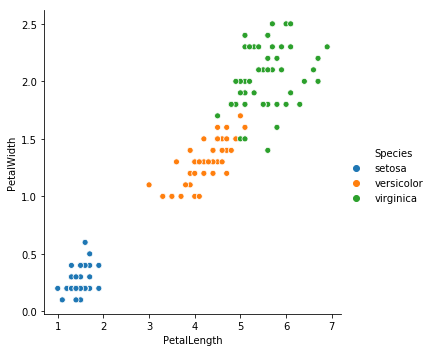

In [70]:
seaborn.relplot(x='PetalLength', y='PetalWidth', hue='Species', data=df)

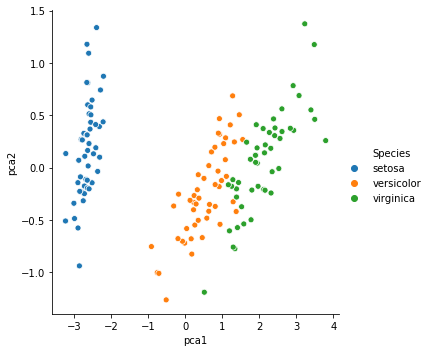

In [71]:
seaborn.relplot(x='pca1', y='pca2', hue='Species', data=df)

In [72]:
# Let's look at classifier performance

cross_val_score(LinearSVC(), df[['SepalLength', 'SepalWidth']], df.Species, cv=10).mean()

0.7933333333333333

In [73]:
cross_val_score(LinearSVC(), df[['pca1', 'pca2']], df.Species, cv=10).mean()

0.9533333333333334

In [74]:
cross_val_score(LinearSVC(), df[['PetalLength', 'PetalWidth']], df.Species, cv=10).mean()

0.9400000000000001

In [75]:
 cross_val_score(LinearSVC(), df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']], df.Species, cv=10).mean()

0.9666666666666668

In [76]:
cross_val_score(LinearSVC(), df[['pca1', 'pca2', 'pca3', 'pca4']], df.Species, cv=10).mean()

0.9533333333333334

In [77]:
pca.explained_variance_ratio_


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

## Let's look at the breast cancer dataset

In [79]:
cancer = pandas.read_csv('~/Dropbox/datasets/breastcancer/wisconsin.csv')
cancer.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial,bare_nuclei,blan_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [82]:
X = cancer.drop(['id', 'class'], axis=1)
y = cancer['class']

In [85]:
cross_val_score(LinearSVC(), X, y, cv=10).mean()

0.9664961636828645

In [109]:
pca = PCA(n_components=4)
X2 = pca.fit_transform(X)

In [110]:
cancer['pca1'] = X2[:, 0]
cancer['pca2'] = X2[:, 1]
cancer.head()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial,bare_nuclei,blan_chromatin,normal_nucleoli,mitoses,class,pca1,pca2
0,1000025,5,1,1,1,2,1,3,1,1,2,-4.482102,0.024023
1,1002945,5,4,4,5,7,10,3,2,1,2,4.819651,-4.739734
2,1015425,3,1,1,1,2,2,3,1,1,2,-4.632960,-0.609533
3,1016277,6,8,8,1,3,4,3,7,1,2,5.096535,3.386599
4,1017023,4,1,1,3,2,1,3,1,1,2,-4.116433,-0.098865


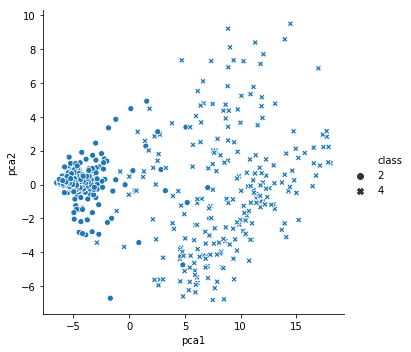

In [111]:
seaborn.relplot(x='pca1', y='pca2', style='class', data=cancer)

In [112]:
cross_val_score(LinearSVC(), X, y, cv=10).mean()

0.9664961636828645

In [113]:
cross_val_score(LinearSVC(), X2, y, cv=10).mean()

0.967988064791134

In [97]:
pca.explained_variance_ratio_


array([0.69050756, 0.07195066])

In [117]:
x = X.iloc[0]

In [118]:
model = LinearSVC()
model.fit(X2, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [121]:
x2 = pca.transform([x])

In [122]:
x2

array([[-4.48210185,  0.02402335, -1.71843215,  0.0713697 ]])

In [123]:
model.predict(x2)

array([2])

In [124]:
cancer.iloc[0]

id                       1.000025e+06
clump_thickness          5.000000e+00
cell_size_uniformity     1.000000e+00
cell_shape_uniformity    1.000000e+00
marginal_adhesion        1.000000e+00
epithelial               2.000000e+00
bare_nuclei              1.000000e+00
blan_chromatin           3.000000e+00
normal_nucleoli          1.000000e+00
mitoses                  1.000000e+00
class                    2.000000e+00
pca1                    -4.482102e+00
pca2                     2.402335e-02
Name: 0, dtype: float64

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.5)

In [130]:
model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)   # This is accuracy

0.9707602339181286

In [131]:
y_pred = model.predict(X_test)

In [133]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          2       1.00      0.96      0.98       223
          4       0.93      0.99      0.96       119

avg / total       0.97      0.97      0.97       342



# Singular Value Decomposition (SVD)

In [135]:
from matrix import Matrix
Utility = Matrix('MoviesRating',
    ['Joe', 'Jim', 'John', 'Jack', 'Jill', 'Jenny', 'Jane'],
    ['Matrix', 'Alien', 'StarWars', 'Casablanca', 'Titanic']
)

In [136]:
Utility.show()

MoviesRating
                        Matrix          Alien       StarWars     Casablanca        Titanic
Joe                   0.0	       0.0	       0.0	       0.0	       0.0	
Jim                   0.0	       0.0	       0.0	       0.0	       0.0	
John                  0.0	       0.0	       0.0	       0.0	       0.0	
Jack                  0.0	       0.0	       0.0	       0.0	       0.0	
Jill                  0.0	       0.0	       0.0	       0.0	       0.0	
Jenny                 0.0	       0.0	       0.0	       0.0	       0.0	
Jane                  0.0	       0.0	       0.0	       0.0	       0.0	



In [137]:
Utility.set(0, [1,1,1,0,0])
Utility.set(1, [3,3,3,0,0])
Utility.set(2, [4,4,4,0,0])
Utility.set(3, [5,5,5,0,0])
Utility.set(4, [0,0,0,4,4])
Utility.set(5, [0,0,0,5,5])
Utility.set(6, [0,0,0,2,2])
Utility.show()


MoviesRating
                        Matrix          Alien       StarWars     Casablanca        Titanic
Joe                   1.0	       1.0	       1.0	       0.0	       0.0	
Jim                   3.0	       3.0	       3.0	       0.0	       0.0	
John                  4.0	       4.0	       4.0	       0.0	       0.0	
Jack                  5.0	       5.0	       5.0	       0.0	       0.0	
Jill                  0.0	       0.0	       0.0	       4.0	       4.0	
Jenny                 0.0	       0.0	       0.0	       5.0	       5.0	
Jane                  0.0	       0.0	       0.0	       2.0	       2.0	



In [151]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)

In [152]:
svd.fit(Utility.mat)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
       random_state=None, tol=0.0)

In [153]:
numpy.round(svd.singular_values_,2)

array([12.37,  9.49])

In [154]:
svd.components_

array([[ 5.77350269e-01,  5.77350269e-01,  5.77350269e-01,
        -8.97562117e-18, -8.97562117e-18],
       [ 9.27902704e-18,  1.09067184e-17,  1.79994658e-18,
         7.07106781e-01,  7.07106781e-01]])

In [155]:
import numpy
numpy.round( svd.components_, 2)

array([[ 0.58,  0.58,  0.58, -0.  , -0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.71,  0.71]])

In [156]:
joe = Utility.mat[0, :]
joe

array([1., 1., 1., 0., 0.])

In [158]:
numpy.round(svd.components_.dot(joe), 2)

array([1.73, 0.  ])

In [159]:
X2 = svd.fit_transform(Utility.mat)

In [161]:
numpy.round(X2, 2)

array([[ 1.73,  0.  ],
       [ 5.2 , -0.  ],
       [ 6.93, -0.  ],
       [ 8.66,  0.  ],
       [ 0.  ,  5.66],
       [ 0.  ,  7.07],
       [ 0.  ,  2.83]])

In [162]:
# make things a little complicated

Utility.set(4, [0,2,0,4,4])
Utility.set(6, [0,1,0,2,2])

In [163]:
Utility.show()

MoviesRating
                        Matrix          Alien       StarWars     Casablanca        Titanic
Joe                   1.0	       1.0	       1.0	       0.0	       0.0	
Jim                   3.0	       3.0	       3.0	       0.0	       0.0	
John                  4.0	       4.0	       4.0	       0.0	       0.0	
Jack                  5.0	       5.0	       5.0	       0.0	       0.0	
Jill                  0.0	       2.0	       0.0	       4.0	       4.0	
Jenny                 0.0	       0.0	       0.0	       5.0	       5.0	
Jane                  0.0	       1.0	       0.0	       2.0	       2.0	



In [170]:
svd = TruncatedSVD(n_components=2)
X2 = svd.fit_transform(Utility.mat)

In [171]:
svd.singular_values_

array([12.48101469,  9.50861406])

In [172]:
numpy.round( svd.components_, 2)

array([[ 0.56,  0.59,  0.56,  0.09,  0.09],
       [-0.13,  0.03, -0.13,  0.7 ,  0.7 ]])

In [179]:
svd = TruncatedSVD(n_components=2)
X2 = svd.fit_transform(Utility.mat)

In [187]:
numpy.round(X2,1)

array([[ 3.3,  7. ],
       [15.1,  1. ],
       [ 2.8,  6.5],
       ...,
       [22.1, -2. ],
       [17. , -0. ],
       [18.5, -0.6]])

In [182]:
X = cancer.drop(['id','class'], axis=1)
y = cancer['class']
X2 = svd.fit_transform(X)


In [188]:
cross_val_score(LinearSVC(), X2, y, cv=10).mean()

0.9693940782023386

In [189]:
len(cancer)

683